<a href="https://colab.research.google.com/github/alpopfares25/stack-overflow-developer-survey-2022/blob/main/stack_overflow_developer_survey_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from pandas_profiling import ProfileReport
import seaborn as sns #for visualization


#Functions for Structure

In [ ]:
def split_answers(df_col,delimeter=";"):
  #sub function
  def splitter(df_col,delimeter):
    return df_col.str.split(delimeter)
  modified_col=splitter(df_col,delimeter)
  null_values=modified_col.isnull()
  modified_col.loc[null_values]= modified_col.loc[null_values].apply(lambda x:[])
  return modified_col

In [ ]:
raw_df=pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')
df=raw_df.copy()
raw_df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [ ]:
df.shape
#there is ~83k answers for 48 questions

(83439, 48)

In [ ]:
#display random answer
df.sample(1).iloc[0]

ResponseId                                                                  38435
MainBranch                                 I am a student who is learning to code
Employment                                                     Student, full-time
Country                                                                     India
US_State                                                                      NaN
UK_Country                                                                    NaN
EdLevel                         Some college/university study without earning ...
Age1stCode                                                          18 - 24 years
LearnCode                       Coding Bootcamp;Other online resources (ex: vi...
YearsCode                                                                       2
YearsCodePro                                                                  NaN
DevType                                                                       NaN
OrgSize         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

###but now why Age, Age1stCode , Yearscode and Yearscodepro are non numeric features!?

In [ ]:
why_not_numeric=['Age','YearsCode','YearsCodePro','Age1stCode']
for col in why_not_numeric:
  print(col)
  print(df[col].unique())
  print("----------------------------------------------------------------------------------")

Age
['25-34 years old' '18-24 years old' '35-44 years old' 'Prefer not to say'
 '45-54 years old' 'Under 18 years old' '65 years or older'
 '55-64 years old' nan]
----------------------------------------------------------------------------------
YearsCode
[nan '7' '17' '3' '4' '6' '16' '12' '15' '10' '40' '9' '26' '14' '39' '20'
 '8' '19' '5' 'Less than 1 year' '22' '2' '1' '34' '21' '13' '25' '24'
 '30' '31' '18' '38' 'More than 50 years' '27' '41' '42' '35' '23' '28'
 '11' '37' '44' '43' '36' '33' '45' '29' '50' '46' '32' '47' '49' '48']
----------------------------------------------------------------------------------
YearsCodePro
[nan '10' '4' '5' '6' '2' '30' '9' '18' '12' '21' '1' '16'
 'Less than 1 year' '15' '3' '35' '7' '8' '17' '14' '26' '25' '20' '50'
 '34' '11' '24' '22' '13' '31' '23' '39' '41' '27' '28' '19' '33'
 'More than 50 years' '37' '29' '32' '43' '40' '38' '45' '42' '46' '36'
 '44' '47' '48' '49']
-------------------------------------------------------------------

In [ ]:
Replace3={
    'YearsCode':{'Less than 1 year': 0,'More than 50 years': 51},
    'YearsCodePro':{'Less than 1 year':0,'More than 50 years':51}}

for col ,replacement in Replace3.items():
  df[col]= df[col].replace(replacement).astype(np.float32)


#Split multiple answers with delimater ;
##we see in features like LanguageHaveWorkedWith,DatabaseHaveWorkedWith etc.. that developer maybe write multiple answer so I want to split each answer he/she write

In [ ]:
object_columns=df.select_dtypes(include='object').columns
for col in object_columns:
  df[col]=split_answers(df[col])

In [ ]:
#after splitting
i=df.sample(1).index[0]
print(raw_df['DatabaseHaveWorkedWith'].iloc[i])
print("------------------------------------")
print(df['DatabaseHaveWorkedWith'].iloc[i])

MariaDB;PostgreSQL;SQLite
------------------------------------
['MariaDB', 'PostgreSQL', 'SQLite']


In [ ]:
i=df.sample(1).index[0]
print(raw_df['LanguageHaveWorkedWith'].iloc[i])
print("------------------------------------")
print(df['LanguageHaveWorkedWith'].iloc[i])

HTML/CSS;Java;SQL;TypeScript
------------------------------------
['HTML/CSS', 'Java', 'SQL', 'TypeScript']


In [ ]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[Slovakia],[],[],"[Secondary school (e.g. American high school, ...",[18 - 24 years],"[Coding Bootcamp, Other online resources (ex: ...",NaN,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],62268.0
1,2,[I am a student who is learning to code],"[Student, full-time]",[Netherlands],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",7.0,...,[18-24 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
2,3,"[I am not primarily a developer, but I write c...","[Student, full-time]",[Russian Federation],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",NaN,...,[18-24 years old],[Man],[No],[Prefer not to say],[Prefer not to say],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
3,4,[I am a developer by profession],[Employed full-time],[Austria],[],[],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[11 - 17 years],[],NaN,...,[35-44 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[I am deaf / hard of hearing],[],[Appropriate in length],[Neither easy nor difficult],NaN
4,5,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[United Kingdom of Great Britain and Northern ...,[],[England],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[5 - 10 years],[Friend or family member],17.0,...,[25-34 years old],[Man],[No],[],[White or of European descent],[None of the above],[],[Appropriate in length],[Easy],NaN


#Descriptive EDA and Visualization

In [ ]:
Job=['DevType']
Skills=['LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith'
        ,'WebframeHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith']

In [ ]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[Slovakia],[],[],"[Secondary school (e.g. American high school, ...",[18 - 24 years],"[Coding Bootcamp, Other online resources (ex: ...",NaN,...,[25-34 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],62268.0
1,2,[I am a student who is learning to code],"[Student, full-time]",[Netherlands],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",7.0,...,[18-24 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
2,3,"[I am not primarily a developer, but I write c...","[Student, full-time]",[Russian Federation],[],[],"[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]",[11 - 17 years],"[Other online resources (ex: videos, blogs, et...",NaN,...,[18-24 years old],[Man],[No],[Prefer not to say],[Prefer not to say],[None of the above],[None of the above],[Appropriate in length],[Easy],NaN
3,4,[I am a developer by profession],[Employed full-time],[Austria],[],[],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[11 - 17 years],[],NaN,...,[35-44 years old],[Man],[No],[Straight / Heterosexual],[White or of European descent],[I am deaf / hard of hearing],[],[Appropriate in length],[Neither easy nor difficult],NaN
4,5,[I am a developer by profession],"[Independent contractor, freelancer, or self-e...",[United Kingdom of Great Britain and Northern ...,[],[England],"[Master’s degree (M.A., M.S., M.Eng., MBA, etc.)]",[5 - 10 years],[Friend or family member],17.0,...,[25-34 years old],[Man],[No],[],[White or of European descent],[None of the above],[],[Appropriate in length],[Easy],NaN


In [ ]:
#onehot encoding
encoded_dfs={}
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
for col in Job+Skills:
    encoded_df=pd.DataFrame(mlb.fit_transform(df[col]),columns=mlb.classes_,index=df[col].index)
    encoded_dfs[col]=encoded_df




In [ ]:
df=pd.concat(encoded_dfs,axis=1)
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

###* Frequency of each Job

In [ ]:
job_freq=df["DevType"].sum().sort_values().reset_index()
job_freq


,index,0
0,Marketing or sales professional,638
1,Scientist,2015
2,"Senior Executive (C-Suite, VP, etc.)",2103
3,"Developer, game or graphics",2112
4,Educator,2369
5,"Engineer, site reliability",2448
6,Academic researcher,2899
7,Product manager,3074
8,Other (please specify):,3545
9,"Developer, QA or test",3611


###Full stack ~32k and marketing 638 really thers is a big difference (imbalanced classes!!)

##*Frequency of each skills

In [ ]:
skill_freq=df.copy().drop(["DevType"],axis=1).sum().sort_values().reset_index()
skill_freq.columns=['group','skills','frequency']
skill_freq


,group,skills,frequency
0,ToolsTechHaveWorkedWith,Pulumi,368
1,LanguageHaveWorkedWith,COBOL,437
2,LanguageHaveWorkedWith,Crystal,466
3,LanguageHaveWorkedWith,APL,536
4,LanguageHaveWorkedWith,Erlang,651
...,...,...,...
120,LanguageHaveWorkedWith,Python,39792
121,LanguageHaveWorkedWith,HTML/CSS,46259
122,LanguageHaveWorkedWith,JavaScript,53587
123,NEWCollabToolsHaveWorkedWith,Visual Studio Code,58026


###Visualize each skill with it's group using treemap

In [ ]:
import plotly.express as px
fig=px.treemap(skill_freq,path=['group','skills'],color_continuous_scale='deep',values='frequency',color='frequency')
fig.update_layout(width=1200,height=700)
fig.show()

###we can extract that in the Language group JavaScript is the most used language...etc

###So now I explain the frequency of each job and skill...but now I will explain the correlation between them

In [ ]:
sorted_job=df["DevType"].sum().sort_values().index.tolist()
sorted_skill=df.copy().drop(["DevType"],axis=1).sum().sort_values().droplevel(level=0).index.tolist()
#role_mask=df['DevType',sorted_job[0]]
#role_mask



Each job and it's precentage of each tech(skill)

In [ ]:
from pandas.core.ops import Level
skills_job=[]
for role in sorted_job:
  role_mask=(df['DevType',role]==True)
  skills_role=pd.concat({skill_coll:df.loc[role_mask,skill_coll].mean()*100
                         for skill_coll in Skills})
  skills_job.append(skills_role)


skills_job=pd.concat(skills_job,axis=1)
skills_job.columns=sorted_job
skills_job=skills_job.reset_index(level=0,drop=True)
skills_job=skills_job.loc[sorted_skill]
skills_job=skills_job.T
skills_job



,Pulumi,COBOL,Crystal,APL,Erlang,TextMate,F#,Flow,Chef,Oracle Cloud Infrastructure,...,AWS,Java,MySQL,Docker,SQL,Python,HTML/CSS,JavaScript,Visual Studio Code,Git
Marketing or sales professional,3.761755,3.761755,4.231975,5.642633,3.761755,5.172414,4.388715,4.545455,5.642633,7.366771,...,43.260188,27.586207,54.075235,32.601881,57.053292,40.909091,71.316614,71.943574,61.285266,70.062696
Scientist,0.942928,1.637717,1.588089,2.431762,1.935484,2.630273,2.133995,2.034739,1.935484,2.382134,...,32.158809,25.607940,31.910670,43.672457,34.937965,76.079404,40.049628,42.431762,52.109181,81.687345
"Senior Executive (C-Suite, VP, etc.)",2.234903,2.092249,1.854494,1.997147,2.900618,3.185925,2.948169,2.092249,2.995720,2.567760,...,59.486448,30.147408,46.742748,58.297670,59.771755,43.747028,63.195435,77.223015,66.096053,84.688540
"Developer, game or graphics",1.136364,1.609848,1.373106,1.893939,2.035985,2.367424,2.793561,2.414773,1.846591,2.556818,...,34.753788,36.789773,43.844697,39.299242,41.145833,46.543561,55.160985,64.914773,72.206439,84.375000
Educator,1.308569,1.772900,1.477417,2.237231,1.857324,2.448290,2.321655,2.532714,2.279443,2.659350,...,36.513297,35.500211,47.868299,45.462220,50.189954,51.878430,60.869565,66.483748,65.512875,82.566484
"Engineer, site reliability",2.900327,1.552288,1.633987,1.511438,3.145425,2.165033,1.919935,2.410131,6.699346,3.472222,...,60.825163,35.334967,49.550654,73.202614,57.843137,60.294118,52.205882,64.174837,67.606209,89.011438
Academic researcher,0.758882,1.552259,1.310797,2.690583,1.552259,1.897206,1.621249,1.759227,1.552259,2.311142,...,28.941014,28.285616,36.081407,43.118317,34.356675,72.093825,40.669196,44.394619,54.294584,80.131080
Product manager,1.073520,1.626545,1.919323,1.626545,1.821731,2.179571,2.016916,2.179571,2.407287,2.439818,...,47.462589,31.067014,50.390371,49.414444,59.694209,41.184125,66.070267,75.829538,70.364346,83.702017
Other (please specify):,0.818054,1.156559,1.015515,1.664316,1.071932,1.354020,1.607898,1.100141,1.861777,1.720733,...,32.863188,28.716502,35.430183,39.774330,43.638928,49.957687,50.126939,57.122708,61.100141,75.994358
"Developer, QA or test",1.024647,1.301579,1.384658,1.301579,1.633896,1.661590,1.855442,2.076987,2.326225,2.215453,...,41.678205,40.847411,49.598449,52.783163,60.814179,47.576849,62.088064,72.445306,69.426752,86.901135


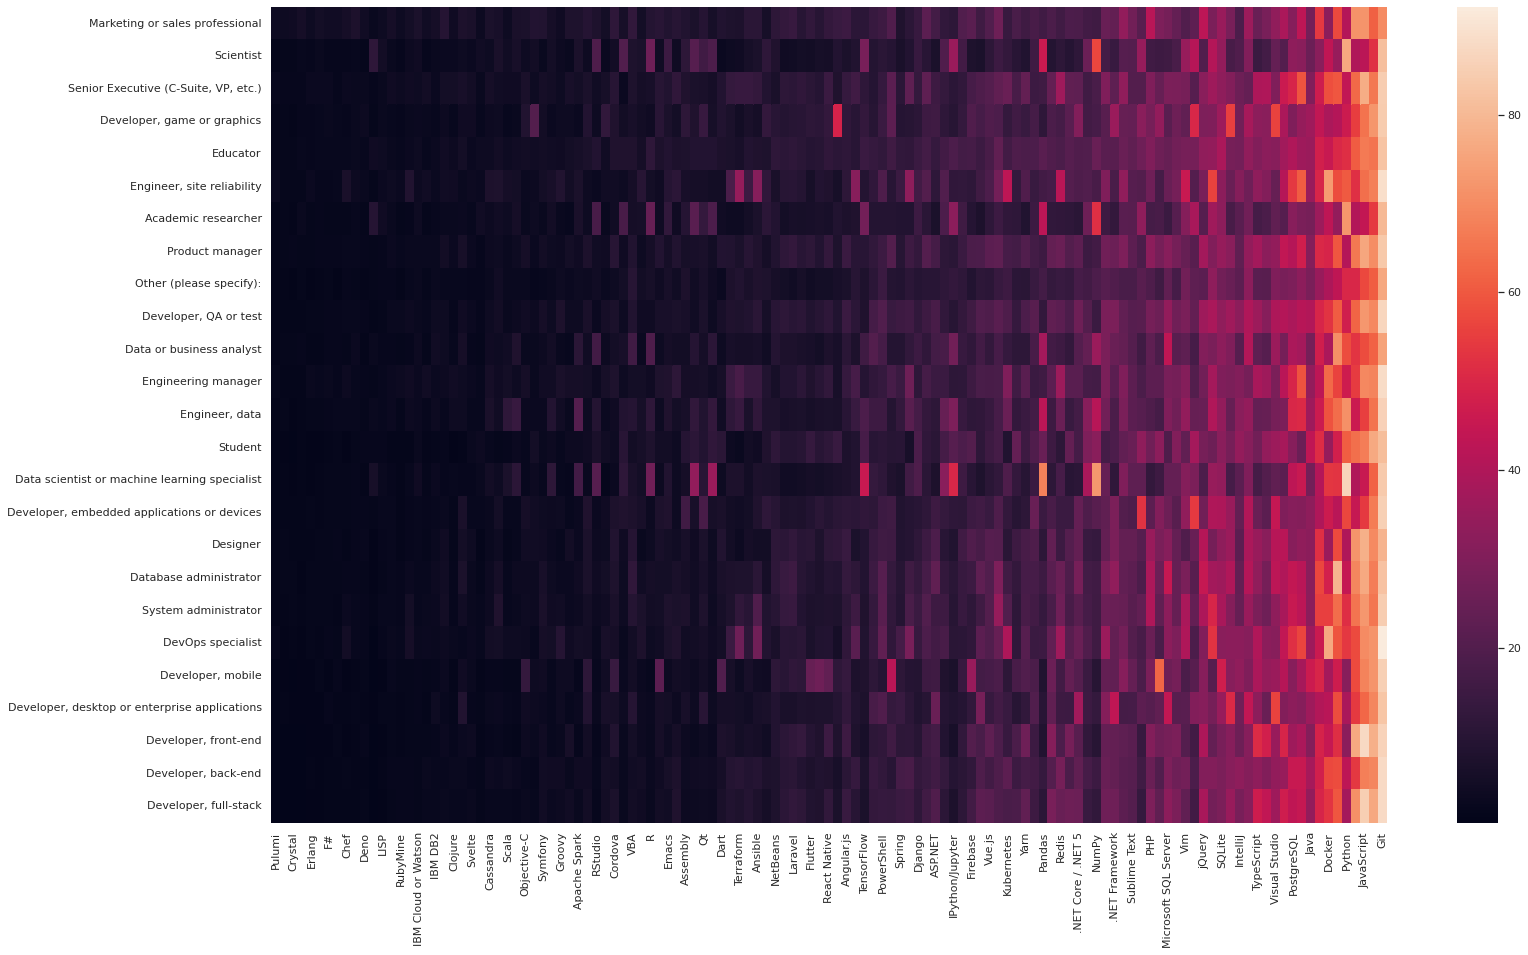

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(skills_job,annot=False)




#*The relationship between jobs and each other  (Jobs clusters)

In [ ]:

#roles_short_dict=roles_names.set_index('orignal name')['short name'].to_dict()
import plotly.figure_factory as ff
fig = ff.create_dendrogram(skills_job,labels=sorted_job,orientation='left')
fig.update_layout(width=800, height=700)
fig.show()